In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
input_path = '/g/data/e14/erd561/Australia_3/'

In [4]:
salt_z0_1_mod = xr.open_dataset(input_path + 'salt_z0_1_mod.nc').salt_z0_1_mod
print(salt_z0_1_mod)
salt_z0_1_slope_mod = xr.open_dataset(input_path + 'salt_z0_1_slope_mod.nc').salt_z0_1_slope_mod*10
print(salt_z0_1_slope_mod)
salt_z0_1_p_value_mod = xr.open_dataset(input_path + 'salt_z0_1_p_value_mod.nc').salt_z0_1_p_value_mod
print(salt_z0_1_p_value_mod)
salt_z0_1_std_err_mod = xr.open_dataset(input_path + 'salt_z0_1_std_err_mod.nc').salt_z0_1_std_err_mod*10
print(salt_z0_1_std_err_mod)

salt_z0_025_mod = xr.open_dataset(input_path + 'salt_z0_025_mod.nc').salt_z0_025_mod
print(salt_z0_025_mod)
salt_z0_025_slope_mod = xr.open_dataset(input_path + 'salt_z0_025_slope_mod.nc').salt_z0_025_slope_mod*10
print(salt_z0_025_slope_mod)
salt_z0_025_p_value_mod = xr.open_dataset(input_path + 'salt_z0_025_p_value_mod.nc').salt_z0_025_p_value_mod
print(salt_z0_025_p_value_mod)
salt_z0_025_std_err_mod = xr.open_dataset(input_path + 'salt_z0_025_std_err_mod.nc').salt_z0_025_std_err_mod*10
print(salt_z0_025_std_err_mod)

salt_z0_01_mod = xr.open_dataset(input_path + 'salt_z0_01_mod.nc').salt_z0_01_mod
print(salt_z0_01_mod)
salt_z0_01_slope_mod = xr.open_dataset(input_path + 'salt_z0_01_slope_mod.nc').salt_z0_01_slope_mod*10
print(salt_z0_01_slope_mod)
salt_z0_01_p_value_mod = xr.open_dataset(input_path + 'salt_z0_01_p_value_mod.nc').salt_z0_01_p_value_mod
print(salt_z0_01_p_value_mod)
salt_z0_01_std_err_mod = xr.open_dataset(input_path + 'salt_z0_01_std_err_mod.nc').salt_z0_01_std_err_mod*10
print(salt_z0_01_std_err_mod)

<xarray.DataArray 'salt_z0_1_mod' (yt_ocean: 160, xt_ocean: 90, year: 25)>
[360000 values with dtype=float32]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -69.63 -69.18 -68.71 ... 17.85 18.59 19.36
  * xt_ocean  (xt_ocean) float64 90.5 91.5 92.5 93.5 ... 176.5 177.5 178.5 179.5
  * year      (year) int64 2233 2234 2235 2236 2237 ... 2253 2254 2255 2256 2257
<xarray.DataArray 'salt_z0_1_slope_mod' (yt_ocean: 160, xt_ocean: 90)>
array([[        nan,         nan,         nan, ...,  0.02209267,
         0.02425845,  0.02715771],
       [        nan,         nan,         nan, ...,  0.01892392,
         0.01986589,  0.02243711],
       [        nan,         nan,         nan, ...,  0.01605128,
         0.01649437,  0.01884531],
       ...,
       [-0.08865462, -0.09453223, -0.08892234, ..., -0.00311429,
        -0.00620977, -0.00718263],
       [-0.05213883, -0.07093136, -0.06238221, ..., -0.00572334,
        -0.00891008, -0.00959883],
       [-0.01163304, -0.04409987, -0.04873282, ..., -0.0

Bbox(x0=0.125, y0=0.3914705882352941, x1=0.29347826086956524, y1=0.6135294117647059)
[0.125, 0.4414705882352941, 0.31097826086956526, 0.6635294117647059]
Bbox(x0=0.3271739130434783, y0=0.3914705882352941, x1=0.4956521739130435, y1=0.6135294117647059)
[0.3271739130434783, 0.4414705882352941, 0.5131521739130435, 0.6635294117647059]
Bbox(x0=0.5293478260869566, y0=0.3914705882352941, x1=0.6978260869565218, y1=0.6135294117647059)
[0.5293478260869566, 0.4414705882352941, 0.7153260869565218, 0.6635294117647059]


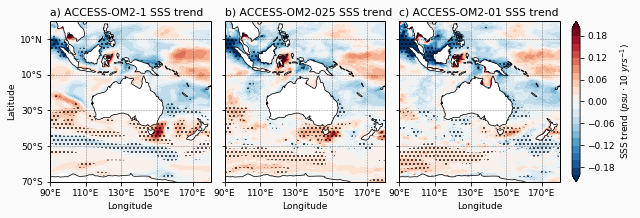

In [6]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,12), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 9})    

row=3
col=4

# ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
# print(pos_plot)
# levels=arange(-2,2,0.2)
# cmap = plt.cm.seismic
# data = salt_z0_1_mod.mean('year').interp(xt_ocean=salt_z0_oisst.lon+360).interp(yt_ocean=salt_z0_oisst.lat)\
# - salt_z0_oisst.mean('year')
# plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('a) ACCESS-OM2-1 SST bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
# ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
# # ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)


# ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
# print(pos_plot)
# # levels=arange(0,30,2)
# # cmap = plt.cm.Spectral
# data = salt_z0_025_mod.mean('year').interp(xt_ocean=salt_z0_oisst.lon+360).interp(yt_ocean=salt_z0_oisst.lat)\
# - salt_z0_oisst.mean('year')
# plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('b) ACCESS-OM2-025 SST bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
# ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)


# ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
# print(pos_plot)
# # levels=arange(0,30,2)
# # cmap = plt.cm.Spectral
# data = salt_z0_01_mod.mean('year').interp(xt_ocean=salt_z0_oisst.lon+360).interp(yt_ocean=salt_z0_oisst.lat)\
# - salt_z0_oisst.mean('year')
# plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('c) ACCESS-OM2-01 SST bias', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
# ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
# axins = inset_axes(ax,
#                    width="5%",  # width = 5% of parent_bbox width
#                    height="100%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.075, 0, 1, 1),
#                    bbox_transform=ax.transAxes,
#                    borderpad=0)
# cbar = plt.colorbar(plot, orientation='vertical',
#                     label=r'SST bias ($^{\circ}C$)', cax=axins)


# ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0+0.09, pos.y0, pos.x1+0.1075, pos.y1] 
# print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
# data = salt_z0_oisst.mean('year')
# plot = plt.contourf(data.lon, data.lat, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('d) NOAA oisst V2 SST', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
# ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
# axins = inset_axes(ax,
#                    width="5%",  # width = 5% of parent_bbox width
#                    height="100%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.075, 0, 1, 1),
#                    bbox_transform=ax.transAxes,
#                    borderpad=0)
# cbar = plt.colorbar(plot, orientation='vertical',
#                     label=r'SST ($^{\circ}C$)', cax=axins)

ax = plt.subplot(row, col, 5, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.05, pos.x1+0.0175, pos.y1+0.05] 
print(pos_plot)
levels=arange(-0.2,0.2,0.04)
cmap = plt.cm.RdBu_r
data = salt_z0_1_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = salt_z0_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 SSS trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 6, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.05, pos.x1+0.0175, pos.y1+0.05] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = salt_z0_025_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = salt_z0_025_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 SSS trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 7, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.05, pos.x1+0.0175, pos.y1+0.05] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = salt_z0_01_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = salt_z0_01_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 SSS trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

# ax = plt.subplot(row, col, 8, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0+0.09, pos.y0+0.05, pos.x1+0.1075, pos.y1+0.05] 
# print(pos_plot)
# # levels=arange(-1,1,0.1)
# # cmap = plt.cm.RdBu_r
# data = salt_z0_slope_oisst
# plot = plt.contourf(data.lon, data.lat, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# levels2=[0, 0.05]
# # cmap2 = plt.cm.RdBu_r
# data2 = salt_z0_p_value_oisst
# plot2 = plt.contourf(data.lon, data.lat, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('h) NOAA oisst V2 SST trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# # ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'SSS trend ($psu \cdot 10\ yrs^{-1}$)', cax=axins)

# ax = plt.subplot(row, col, 9, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0+0.08, pos.x1+0.0175, pos.y1+0.08] 
# print(pos_plot)
# levels=arange(-1,1,0.2)
# cmap = plt.cm.RdBu_r
# data = salt_z0_1_slope_mod - salt_z0_1_slope_global_mod
# plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# levels2=[0, 0.05]
# # cmap2 = plt.cm.RdBu_r
# data2 = salt_z0_1_p_value_mod
# plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('i) ACCESS-OM2-1 SST trend \n   relative to global SST trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
# # ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
# gtrend = np.round(salt_z0_1_slope_global_mod,2)
# plt.text(125,-22.5,str(gtrend), fontweight='bold')
# plt.text(117.5,-30,'$^{\circ}C \cdot 10\ yrs^{-1}$')

# ax = plt.subplot(row, col, 10, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0+0.08, pos.x1+0.0175, pos.y1+0.08] 
# print(pos_plot)
# # levels=arange(-salt_z0_025_slope_global_mod*4,salt_z0_025_slope_global_mod*4,salt_z0_025_slope_global_mod)
# # cmap = plt.cm.RdBu_r
# data = salt_z0_025_slope_mod - salt_z0_025_slope_global_mod
# plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# levels2=[0, 0.05]
# # cmap2 = plt.cm.RdBu_r
# data2 = salt_z0_025_p_value_mod
# plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('j) ACCESS-OM2-025 SST trend \n   relative to global SST trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
# gtrend = np.round(salt_z0_025_slope_global_mod,2)
# plt.text(125,-22.5,str(gtrend), fontweight='bold')
# plt.text(117.5,-30,'$^{\circ}C \cdot 10\ yrs^{-1}$')

# ax = plt.subplot(row, col, 11, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0+0.08, pos.x1+0.0175, pos.y1+0.08] 
# print(pos_plot)
# # levels=arange(-salt_z0_01_slope_global_mod*4,salt_z0_01_slope_global_mod*4,salt_z0_01_slope_global_mod)
# # cmap = plt.cm.RdBu_r
# data = salt_z0_01_slope_mod - salt_z0_01_slope_global_mod
# plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# levels2=[0, 0.05]
# # cmap2 = plt.cm.RdBu_r
# data2 = salt_z0_01_p_value_mod
# plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('k) ACCESS-OM2-01 SST trend \n   relative to global SST trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
# gtrend = np.round(salt_z0_01_slope_global_mod,2)
# plt.text(125,-22.5,str(gtrend), fontweight='bold')
# plt.text(117.5,-30,'$^{\circ}C \cdot 10\ yrs^{-1}$')

# ax = plt.subplot(row, col, 12, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0+0.09, pos.y0+0.08, pos.x1+0.1075, pos.y1+0.08] 
# print(pos_plot)
# # levels=arange(-salt_z0_slope_global_oisst*4,salt_z0_slope_global_oisst*4,salt_z0_slope_global_oisst)
# print(levels)
# cmap = plt.cm.RdBu_r
# data = salt_z0_slope_oisst - salt_z0_slope_global_oisst
# plot = plt.contourf(data.lon, data.lat, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# levels2=[0, 0.05]
# # cmap2 = plt.cm.RdBu_r
# data2 = salt_z0_p_value_oisst
# plot2 = plt.contourf(data.lon, data.lat, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('l) NOAA OISST V2 SST trend \n   relative to global SST trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
# gtrend = np.round(salt_z0_slope_global_oisst,2)
# plt.text(125,-22.5,str(gtrend), fontweight='bold')
# plt.text(117.5,-30,'$^{\circ}C \cdot 10\ yrs^{-1}$')
# axins = inset_axes(ax,
#                    width="5%",  # width = 5% of parent_bbox width
#                    height="100%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.075, 0, 1, 1),
#                    bbox_transform=ax.transAxes,
#                    borderpad=0)
# cbar = plt.colorbar(plot, orientation='vertical',
#                     label='SST trend relative to global SST trend\n'
#                     +r'($^{\circ}C \cdot 10\ yrs^{-1}$)', cax=axins)
# cbar.set_ticks(levels)
# cbar.ax.set_yticklabels([r'$\times$ -4',r'$\times$ -3',r'$\times$ -2',r'$\times$ -1',
#                         r'$\times$ 1',r'$\times$ 2',r'$\times$ 3',r'$\times$ 4',r'$\times$ 5'])

savefigure('SSS_bias_trend_9317')